In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})


El algoritmo fft sin condición de contorno alguna para ecuación del calor

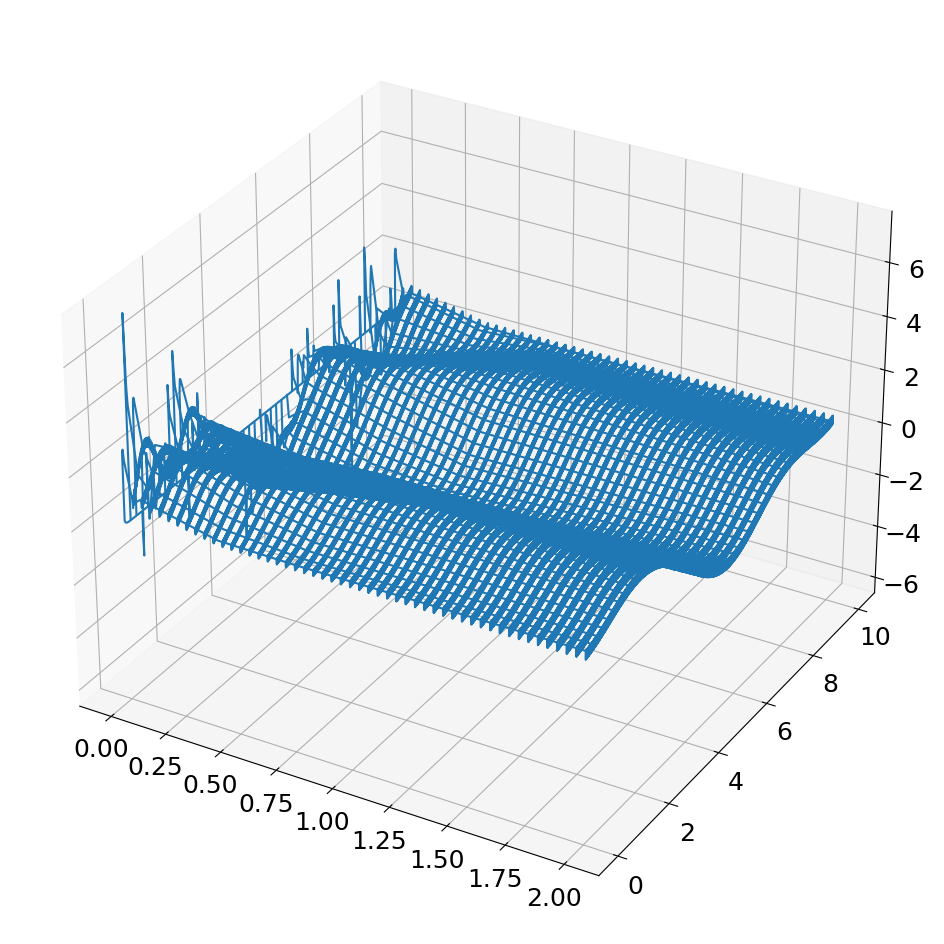

In [37]:
mu = 1
nu = 0.1

#Spatial mesh
L_x = 10 #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array

#Temporal mesh
L_t = 2 #Duration of simulation [s]
dt = 0.001  #Infinitesimal time
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array

#Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)


#Def of the initial condition
s, shift = 25.**2., 2. # Initial data is a soliton
u0 = (3.*s*np.cosh(.5*(np.sqrt(s)*(X+shift)))**(-2.)).reshape(N_x,)


#Definition of ODE system (PDE ---(FFT)---> ODE system)
def burg_system(u,t,k,mu, nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat
    u_hat_xxx=1j*k**3*u_hat
    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)
    u_xxx = np.fft.ifft(u_hat_xxx)
    #ODE resolution -mu*u*u_x+
    u_t =-u*u_x-u_xxx
    return u_t.real


#PDE resolution (ODE system resolution)
U = odeint(burg_system, u0, T, args=(k,mu, nu, ), mxstep=5000).T


To, Xo= np.meshgrid(T, X)
Z = U

ax = plt.axes(projection ='3d')
ax.plot_wireframe(To, Xo, Z)

plt.show()

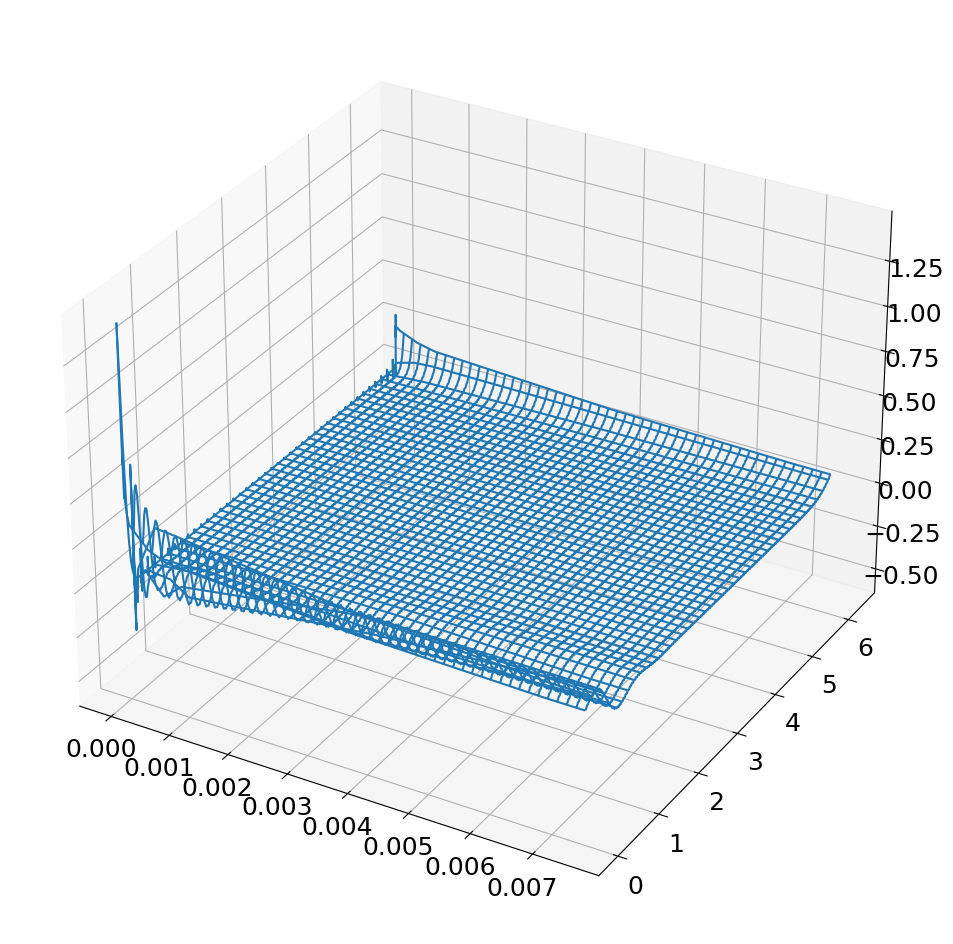

In [72]:
mu = 1
nu = 0.1

#Spatial mesh
L_x = 2*np.pi #Range of the domain according to x [m]
N_x = 256 #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array



max_t = 0.0075
dt = 0.02*N_x**(-2)
max_tsteps = int(round(max_t/dt))
T=np.linspace(0, max_t, max_tsteps)
#Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = 1/int(N_x/L_x))


#Def of the initial condition
s, shift = 25.**2., 2. # Initial data is a soliton
u0 = (3.*s*np.cosh(.5*(np.sqrt(s)*(X+shift)))**(-2.)).reshape(N_x,)


#Definition of ODE system (PDE ---(FFT)---> ODE system)
def burg_system(u,t,k,mu, nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat
    u_hat_xxx=1j*k**3*u_hat
    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)
    u_xxx = np.fft.ifft(u_hat_xxx)
    #ODE resolution -mu*u*u_x+
    u_t =-u*u_x-u_xxx
    return u_t.real


#PDE resolution (ODE system resolution)
U = odeint(burg_system, u0, T, args=(k,mu, nu, ), mxstep=5000).T


To, Xo= np.meshgrid(T, X)
Z = U

ax = plt.axes(projection ='3d')
ax.plot_wireframe(To, Xo, Z)

plt.show()